# Qiskit Assignment 0
## README
Welcome to your first Qiskit assignment! Qiskit is IBM's open-source SDK for working with quantum computers. We will be using Qiskit for programming assignments this semester. This assignment will help you begin to familarize yourself with the assignment workflow.

Qiskit assignments generally contain a mix of code problems and short answer questions. Some questions will be autograded and others are graded by hand. Make sure to follow all instructions to receive full credit. You should fill in code wherever you see `...`, and you should not change the code given to you unless explicitly stated to. **Nearly all needed code can be found in linked documentation throughout your notebook**. 

When debugging your solutions, fix the top error first as subsequent tests may not pass if preliminary ones fail. Minimal credit will be awarded to solutions that do not pass all tests.

To submit your assignment, follow instructions at the bottom of the notebook and **submit only to the corresponding "auto" assignment** (e.g. qiskit 0 auto). Double check your autograder score on Gradescope to ensure it matches the output of your local tests.

### Learning Objectives
1. Get familiar with Qiskit
2. Understand the difference between classical and quantum bits
3. Build simple quantum circuits
4. Run a circuit on a quantum computer

### Resources
Qiskit assignments are designed to be collaborative and open internet. Where possible, links to useful documentation will be embedded within questions. You're free to discuss these tasks with TAs and peers, but do **write your own solutions**. For some questions, there may be additional restrictions on the ways you can solve them. To ensure compliance with course policies and assignment instructions, we reserve the right to inspect your code.

**NAME**: REPLACE WITH YOUR NAME

**STUDENT ID**: REPLACE WITH YOUR STUDENT ID

In [1]:
# RUN THIS CELL!
# Import Qiskit and other needed packages
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit_textbook.tools import array_to_latex
from qiskit.providers.ibmq import least_busy
import numpy as np
import pprint

#### Task 1 - Building a Circuit (20 pts)
Using Qiskit's [QuantumCircuit class](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html?highlight=quantumcircuit), fill in the `simpleCircuit()` function as follows:

- Create a quantum circuit with 1 qubit and 1 classical bit
- Measure the qubit
- Return the circuit

In [2]:
def simpleCircuit():
    # BEGIN SOLUTION
    qc = QuantumCircuit(1,1)
    qc.measure(0,0)
    return qc
    # END SOLUTION

In [3]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED FUNCTION TO RETURN TYPE QuantumCircuit
""" # END TEST CONFIG
isinstance(simpleCircuit(), QuantumCircuit)

True

In [4]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED CIRCUIT TO HAVE 1 CLASSICAL BIT
""" # END TEST CONFIG
simpleCircuit().num_clbits == 1

True

In [5]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED CIRCUIT TO HAVE 1 QUBIT
""" # END TEST CONFIG
simpleCircuit().num_qubits == 1

True

In [6]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED CIRCUIT TO PERFORM A MEASUREMENT
""" # END TEST CONFIG
def testMeasurementPerformedSimple():
    ops = simpleCircuit().count_ops()
    return (ops['measure'] == 1 if 'measure' in ops else False)

testMeasurementPerformedSimple()

True

In [7]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED CIRCUIT TO PRODUCE STATE |0>
""" # END TEST CONFIG
def testProbabilitiesSimple():
    qc = simpleCircuit()
    job = execute(qc, BasicAer.get_backend('statevector_simulator'), shots=1)
    return list(job.result().get_statevector(qc)) == [1,0]

testProbabilitiesSimple()

True

In [8]:
""" # BEGIN TEST CONFIG
hidden: false
points: 15
failure_message: ONE OF THE ABOVE TESTS IS NOT PASSING
""" # END TEST CONFIG
def testMeasurementPerformedSimple():
    ops = simpleCircuit().count_ops()
    return (ops['measure'] == 1 if 'measure' in ops else False)
def testProbabilitiesSimple():
    qc = simpleCircuit()
    job = execute(qc, BasicAer.get_backend('statevector_simulator'), shots=1)
    return list(job.result().get_statevector(qc)) == [1,0]

isinstance(simpleCircuit(), QuantumCircuit) \
and simpleCircuit().num_clbits == 1 \
and simpleCircuit().num_qubits == 1 \
and testMeasurementPerformedSimple() \
and testProbabilitiesSimple()

True

#### Task 2 - Drawing Circuits (20 pts)
We can visualize circuits using the QuantumCircuit's [draw method](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.draw.html#qiskit.circuit.QuantumCircuit.draw).

Draw your circuit from Task 1 using the matplotlib format.

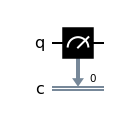

In [9]:
# Draw your circuit in this cell

# BEGIN SOLUTION
simpleCircuit().draw(output="mpl")
# END SOLUTION

#### Task 3 - Simulating Circuits and Getting Results (10 pts)
Circuits aren't very helpful unless we can run them and observe the outputs.
We will frequently use the [qasm simulator](https://qiskit.org/documentation/stubs/qiskit.providers.aer.QasmSimulator.html) to simulate our circuit on a quantum machine.

Create a job that runs a simpleCircuit `468` times. You will find these [docs](https://qiskit.org/documentation/apidoc/execute.html) useful. (Think: Do the results match what we'd expect from this circuit?)

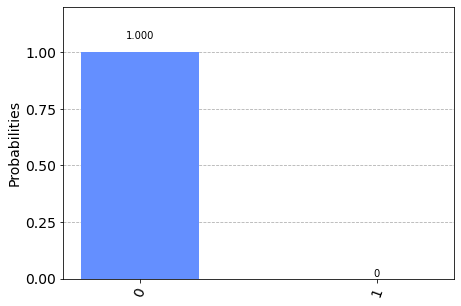

In [10]:
qc = simpleCircuit()
qasm_sim = BasicAer.get_backend("qasm_simulator")

job = execute(qc, qasm_sim, shots=468) # SOLUTION

counts = job.result().get_counts()

# This loop includes a state with zero probability 
# on the histogram for the purpose of 
# comparison with the next section.
for state in ['0','1']:
    if state not in counts:
        counts[state] = 0
        
plot_histogram(counts)

In [11]:
""" # BEGIN TEST CONFIG
hidden: false
points: 10
failure_message: EXPECTED simpleCircuit TO BE RUN 468 TIMES
""" # END TEST CONFIG
'0' in counts and counts['0'] == 468

True

#### Task 4 - Running Your Circuit on a Quantum Computer (20 pts)
Now let's compare our results from the simulator with the results from a real quantum device.

Create an account with [IBM Quantum](https://quantum-computing.ibm.com/login) and paste your API token into the code block below.

In [12]:
# IBMQ.save_account('REPLACE WITH YOUR TOKEN AND UNCOMMENT')

After running `save_account`, **please delete your token** from the previous cell and save your notebook. This keeps your token private to you and ensures the autograder does not time out. Credentials will be saved to your computer, and calling `load_account` is sufficient to retrieve them for future assignments.

In [13]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

The code block below lists some info about the available IBM quantum devices and queues.

In [14]:
provider = IBMQ.get_provider(hub='ibm-q')
for backend in provider.backends():
    status = backend.status().to_dict()
    if status['operational'] and status['status_msg'] == 'active':
        if 'simulator' not in status['backend_name']:
            print(pprint.pformat(status))

{'backend_name': 'ibmq_lima',
 'backend_version': '1.0.40',
 'operational': True,
 'pending_jobs': 111,
 'status_msg': 'active'}
{'backend_name': 'ibmq_belem',
 'backend_version': '1.0.53',
 'operational': True,
 'pending_jobs': 6,
 'status_msg': 'active'}
{'backend_name': 'ibmq_quito',
 'backend_version': '1.1.35',
 'operational': True,
 'pending_jobs': 6,
 'status_msg': 'active'}
{'backend_name': 'ibmq_manila',
 'backend_version': '1.1.0',
 'operational': True,
 'pending_jobs': 9,
 'status_msg': 'active'}
{'backend_name': 'ibm_nairobi',
 'backend_version': '1.2.0',
 'operational': True,
 'pending_jobs': 18,
 'status_msg': 'active'}
{'backend_name': 'ibm_oslo',
 'backend_version': '1.0.14',
 'operational': True,
 'pending_jobs': 20,
 'status_msg': 'active'}


We can also use the [`least_busy`](https://qiskit.org/textbook/ch-algorithms/superdense-coding.html#4.-Superdense-Coding-on-a-Real-Quantum-Computer-) method to pick the quantum device with the fewest pending jobs.

In [15]:
lb = least_busy(IBMQ.get_provider(hub='ibm-q').backends(filters=lambda x: not x.configuration().simulator 
                                       and x.status().operational == True))
print("Least busy quantum computer:", lb)

Least busy quantum computer: ibmq_belem


Choose one of the backends from above and insert its name into the code block below. Running this code block will execute your circuit on an IBM quantum device. **Note: It may take a while for your job to complete based on queue times.** Use the generated link to check your job's status.

Check job status here: https://quantum-computing.ibm.com/jobs/639f8dc1a8e4a113e1b3cae2


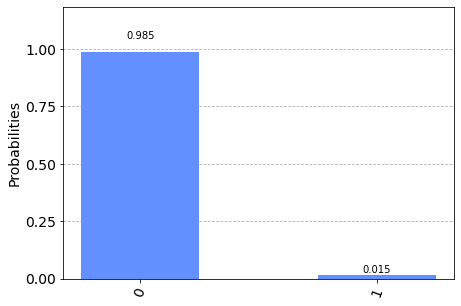

In [17]:
ibmqc = provider.get_backend('...REPLACE WITH A BACKEND NAME...')

job = execute(simpleCircuit(), ibmqc, shots=468)
print("Check job status here:", "https://quantum-computing.ibm.com/jobs/" + job.job_id())
res = job.result()
counts_ibm = res.get_counts()
plot_histogram(counts_ibm)

Do you see the same results as the qasm simulator? Why or why not? What is the error rate?

No. There is error induced by the quantum computer's inherent noise which causes some measurements to yield $|1\rangle$. The error rate is about 1.5%.

#### Task 5 - Another Circuit (15 pts)
We now turn to Qiskit's [Pauli X gate](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#xgate) so that we can prepare qubits in the $|1\rangle$ state.

There is also a brief discussion of this gate at the end of `lecture 1: Background`.

- Fill in the below function to return a new QuantumCircuit with 2 qubits and 2 classical bits
- Prepare the first qubit in state $|0\rangle$ and the second in state $|1\rangle$
- Perform a measurement of each qubit onto its corresponding classical bit
- Draw the circuit using matplotlib

In [18]:
def opposites():
    # BEGIN SOLUTION
    qc = QuantumCircuit(2,2)
    qc.x(1)
    qc.measure(0,0)
    qc.measure(1,1)
    return qc
    # END SOLUTION

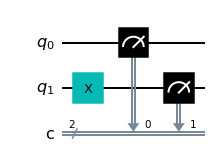

In [19]:
# Draw your circuit in this cell

# BEGIN SOLUTION
opposites().draw(output='mpl')
# END SOLUTION

In [20]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED FUNCTION TO RETURN TYPE QuantumCircuit
""" # END TEST CONFIG
isinstance(opposites(), QuantumCircuit)

True

In [21]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED CIRCUIT TO HAVE 2 CLASSICAL BITS
""" # END TEST CONFIG
opposites().num_clbits == 2

True

In [22]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: EXPECTED CIRCUIT TO HAVE 2 QUBITS
""" # END TEST CONFIG
opposites().num_qubits == 2

True

In [23]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: CIRCUIT SHOULD NOT USE INITIALIZE
""" # END TEST CONFIG
def testNoInitialize():
    ops = opposites().count_ops()
    return 'initialize' not in ops

testNoInitialize()

True

In [24]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: CIRCUIT SHOULD MEASURE EACH QUBIT TO ITS CORRESPONDING CLASSICAL BIT
""" # END TEST CONFIG
def testRequirementsOpposites():
    ops = opposites().count_ops()
    if 'measure' not in ops:
        return False
    x = 'x' in ops and ops['x'] == 1
    return ops['measure'] == 2 and x

testRequirementsOpposites()

True

In [25]:
""" # BEGIN TEST CONFIG
hidden: false
points: 1
failure_message: Measured unexpected state.
""" # END TEST CONFIG
def testProbabilitiesOpposites():
    qc = opposites().reverse_bits()
    job = execute(qc, BasicAer.get_backend('statevector_simulator'), shots=10)
    return list(job.result().get_statevector(qc)) == [0, 1, 0, 0]

testProbabilitiesOpposites()

True

In [26]:
""" # BEGIN TEST CONFIG
hidden: false
points: 9
failure_message: ONE OF THE ABOVE TESTS IS NOT PASSING
""" # END TEST CONFIG

def testNoInitialize():
    ops = opposites().count_ops()
    return 'initialize' not in ops
def testProbabilitiesOpposites():
    qc = opposites().reverse_bits()
    job = execute(qc, BasicAer.get_backend('statevector_simulator'), shots=10)
    return list(job.result().get_statevector(qc)) == [0, 1, 0, 0]
def testRequirementsOpposites():
    ops = opposites().count_ops()
    if 'measure' not in ops:
        return False
    x = 'x' in ops and ops['x'] == 1
    return ops['measure'] == 2 and x

isinstance(opposites(), QuantumCircuit) \
and opposites().num_clbits == 2 \
and opposites().num_qubits == 2 \
and testNoInitialize() \
and testRequirementsOpposites() \
and testProbabilitiesOpposites()

True

#### Task 6 - More Counts (15 pts)

Think about what output you expect to see from this circuit. 
- Run your circuit on the qasm simulator 468 times
- Store the measurement results in `counts_oppo`

Note that the following cell uses Qiskit's [`reverse_bits()`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.reverse_bits.html#qiskit.circuit.QuantumCircuit.reverse_bits) function. This flips the ordering of qubits in a multi-qubit circuit and changes the [endianness](https://en.wikipedia.org/wiki/Endianness) of the resulting statevector, $|01\rangle$. The reasons for this will become clear in the upcoming lectures and notebook assignments.

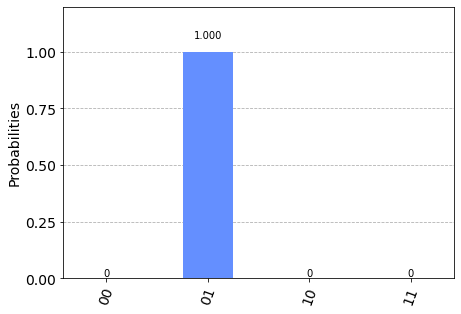

In [27]:
qc = opposites().reverse_bits()

# BEGIN SOLUTION
job = execute(qc, BasicAer.get_backend("qasm_simulator"), shots=468)
counts_oppo = job.result().get_counts()
# END SOLUTION

for state in ['00','01','10','11']:
    if state not in counts_oppo:
        counts_oppo[state] = 0
plot_histogram(counts_oppo)

In [28]:
""" # BEGIN TEST CONFIG
hidden: false
points: 15
failure_message: EXPECTED opposites TO BE RUN 468 TIMES
""" # END TEST CONFIG
'01' in counts_oppo and counts_oppo['01'] == 468

True

## Conclusion
This is the general workflow of building and running quantum circuits. We will introduce more qubits and gates as needed to solve problems.

Next time: the unitary gate and single qubit circuits!